### Create Artificial Dataset

In [1]:
from train import *

In [2]:
n_train_qids = 800
n_val_qids = 200
n_docs = 20
n_dim = 50

In [3]:
X_train, Y_train, X_val, Y_val = create_dataset(n_train_qids, n_val_qids, n_docs, n_dim)

### Check relevance distribution

In [4]:
import seaborn as sns

/Users/mmt9876/opt/anaconda3/envs/pytorch-v1/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

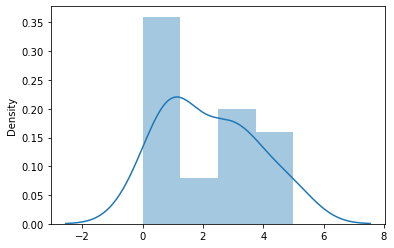

In [5]:
rand_idx = random.randint(0, n_train_qids-1)
sns.distplot(Y_train[rand_idx])

We can see the relevance distribution is different for each qid

### Build Model

In [6]:
from model import RankNet

In [7]:
net = RankNet(n_dim)

### Train the model

In [8]:
import torch.optim as optim
from tqdm import tqdm

In [9]:
optimizer = optim.Adam(net.parameters(), lr=1e-3)
n_sampling_combinations = 50
n_epochs = 250

In [10]:
loss_list, steps_list, ndcg_list = [], [], []
for epoch in tqdm(range(n_epochs)):
    loss, n_steps, ndcg = train_one_epoch(X_train, Y_train, X_val, Y_val, net, optimizer, n_sampling_combinations)
    loss_list.append(loss)
    steps_list.append(n_steps)
    ndcg_list.append(ndcg)

100%|██████████| 250/250 [20:48<00:00,  4.99s/it]


#### Plot loss and metrics

In [11]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Train Loss')

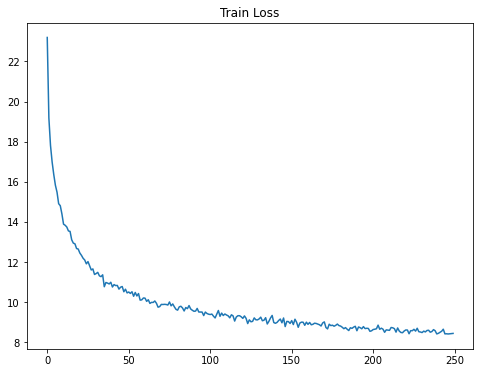

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(loss_list)
plt.title("Train Loss")

Text(0.5, 1.0, 'Swap Steps')

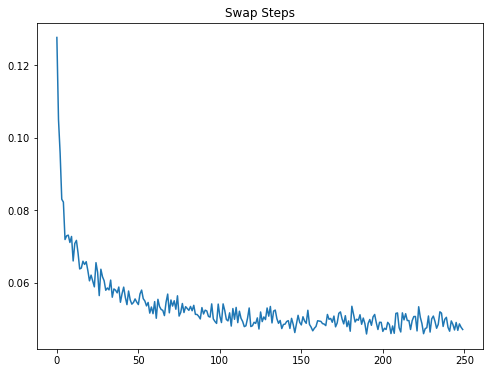

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(steps_list)
plt.title("Swap Steps")

Text(0.5, 1.0, 'NDCG')

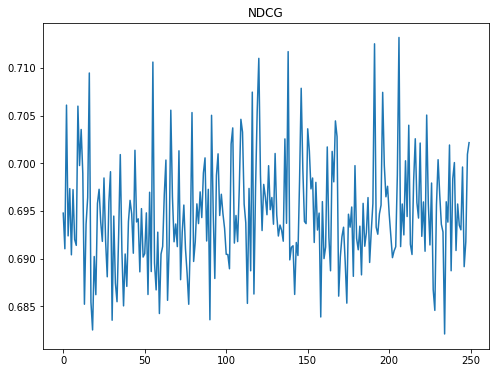

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(ndcg_list)
plt.title("NDCG")